<a href="https://colab.research.google.com/github/internetian/COVID-19/blob/master/World_wide_Covid_19_Status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 현대건설 진출국 COVID-19 현황
- 확진자(confirmed), 사망자(deaths), 회복자(recovered) 시계열 데이터 활용한 국별 COVID-19 위험도 분석
- 출처 : 존스홉킨스대학 데이터사이언스 연구팀
  https://github.com/CSSEGISandData/COVID-19

In [ ]:
#@title
from bs4 import BeautifulSoup
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import io
from matplotlib import font_manager #, rc
#font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#rc('font', family=font_name)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#@title
from google.colab import files
uploaded=files.upload()

Saving time_series_covid19_confirmed_global.csv to time_series_covid19_confirmed_global.csv
Saving time_series_covid19_deaths_global.csv to time_series_covid19_deaths_global.csv
Saving time_series_covid19_recovered_global.csv to time_series_covid19_recovered_global.csv


In [ ]:
#@title
confirmed=pd.read_csv(io.StringIO(uploaded['time_series_covid19_confirmed_global.csv'].decode('utf-8')))
deaths=pd.read_csv(io.StringIO(uploaded['time_series_covid19_deaths_global.csv'].decode('utf-8')))
recovered=pd.read_csv(io.StringIO(uploaded['time_series_covid19_recovered_global.csv'].decode('utf-8')))

In [ ]:
#@title
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113


In [ ]:
#위키디피아 인구데이터 딕셔너리 만들기
pop_list={'Korea, South':51780579,'Burma':54339766,'Indonesia':267700000,'Singapore':5638700,'Qatar':2772294	,'Kuwait':4420110,'United Arab Emirates':9682088,'Vietnam':96208984,'Algeria':44851834,'Chile':19107216,'Venezuela':32219521,'Panama':4218808,'Saudi Arabia':33413660	}


In [ ]:
#@title
def trans_df(x):   #원본 데이터프레임을 시계열 데이터프레임으로 변환하는 함수
    g=x.groupby(['Country/Region']).sum()
    r=g.transpose()
    r1=r.drop(['Lat','Long'])
    r2=r1.astype(float)
    r2=r2.reset_index()    #일자를 인덱스에서 열로 바꿈
    r2['index']=pd.to_datetime(r2['index'])
    r2=r2.set_index(['index'])
    return r2

c8=trans_df(confirmed)
d8=trans_df(deaths)
r8=trans_df(recovered)


# 국가별로 데이터프레임 합치는 함수(confirmed,deaths,recovered)
def mix_df_country(a):
    total_df=pd.DataFrame(columns=['date','Country/Region','confirmed','deaths','recovered'])
    total_df['date']=c8.index.tolist()
    total_df['Country/Region']=a
    total_df['confirmed']=c8[a].tolist()
    total_df['deaths']=d8[a].tolist()
    total_df['recovered']=r8[a].tolist()
    total_df['population']=pop_list[a]
    return total_df

def concat_df(list_):     #리스트 형태로 국가를 입력하면 데이터프레임으로 결합해줌
    total_df=pd.DataFrame()
    for i in list_:
        k=mix_df_country(i)
        total_df=pd.concat([total_df,k],axis=0,ignore_index=True)
    return total_df

In [ ]:
#@title
country_list=['Korea, South','Burma','Indonesia','Singapore','Qatar','Kuwait','United Arab Emirates','Vietnam','Algeria','Chile','Venezuela','Panama','Saudi Arabia']
ttl_df=concat_df(country_list) #상기 국가 데이터프레임 합치기

In [ ]:
#@title
ttl_df['net_confirmed']=ttl_df['confirmed']-ttl_df['recovered']-ttl_df['deaths'] #순확진자수 구하기
ttl_df['survival_rate']=ttl_df['recovered']/ttl_df['confirmed']*100 #확진시 완치율 구하기
ttl_df['death_rate']=ttl_df['deaths']/ttl_df['confirmed']*100  #확진시 사망율 구하기
ttl_df['net_confirmed_rate']=ttl_df['net_confirmed']/ttl_df['population']*100  #순환직율 구하기
ttl_df['confirmed_rate']=ttl_df['confirmed']/ttl_df['population']*100

##진출국 순확진자 동향
- 순확진자는 '확진자 - 완치자 - 사망자'로 현재 확진 상태인 인원
- 인도네시아는 순확진자가 증가세를 나타내고 있으며 최다 확진자를 기록한 칠레는 6월부 다수의 완치자/사망자 발생으로, 카타르는 다수의 완치자로 증가세가 급감함
- 사우디 증가세가 뚜렷하고 수치는 미미하나 파나마, 베네수엘라에서 순확진자 증가세가 나타남



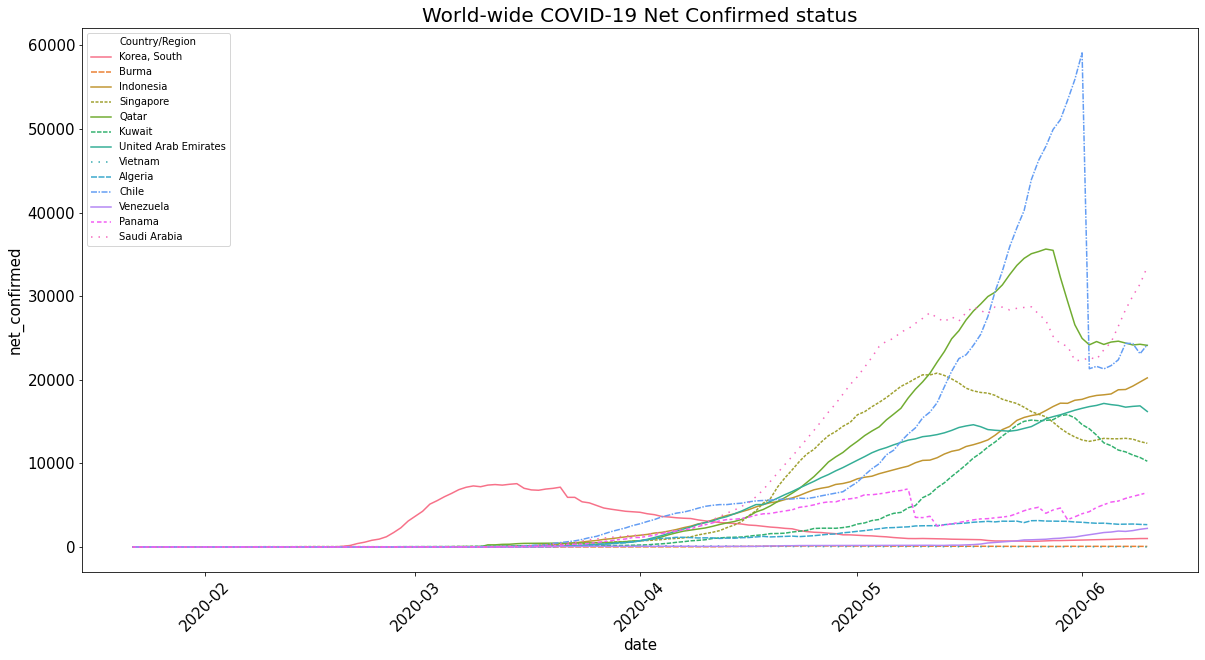

In [ ]:
#@title
#진출국 순확진자Time Series data visualization

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Net Confirmed status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')

dash_styles = ["",(4, 1),"",(2, 1),"",(3, 1),
               "",(1, 4, 1, 4),(4,1),(4, 1, 1, 1),"",(2, 2, 3, 1.5),(1,4)]
              
ax=sns.lineplot(x='date',y='net_confirmed',hue='Country/Region', style='Country/Region',dashes=dash_styles, data=ttl_df)

plt.show()

# 진출국 확진자 동향
- 칠레, 사우디, 카타르, UAE, 싱가폴 순으로 확진자 증가세가 뚜렷

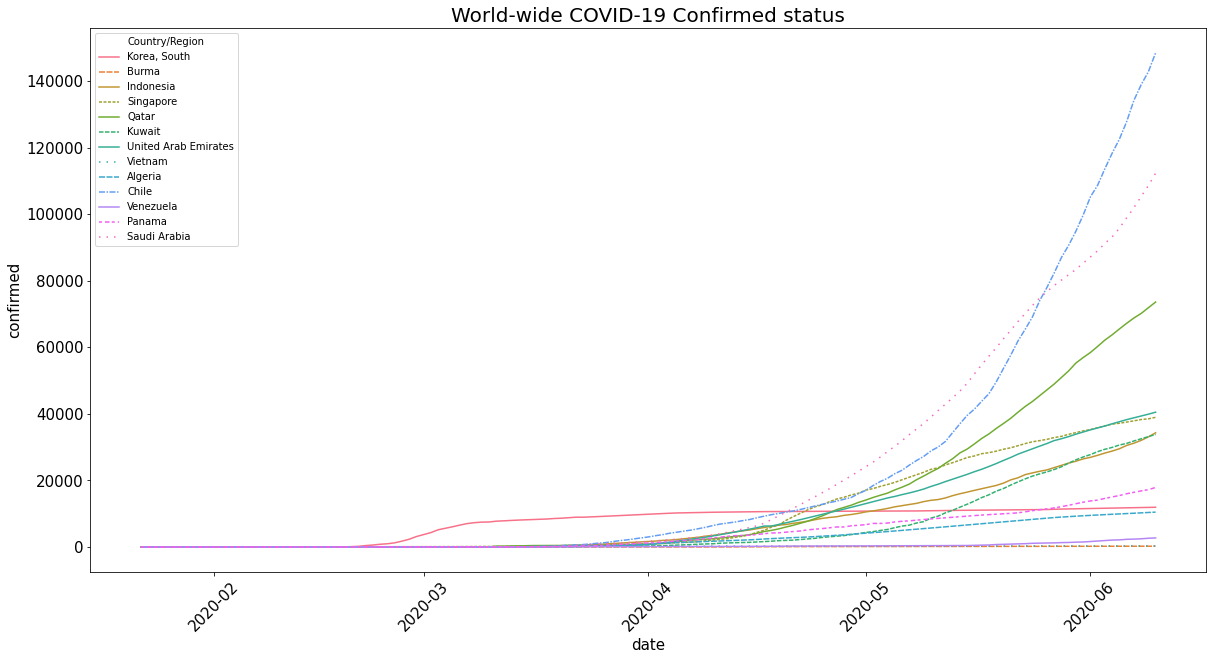

In [ ]:
#@title
#진출국 확진자Time Series data visualization

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Confirmed status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')

dash_styles = ["",(4, 1),"",(2, 1),"",(3, 1),
               "",(1, 4, 1, 4),(4,1),(4, 1, 1, 1),"",(2, 2, 3, 1.5),(1,4)]
              
ax=sns.lineplot(x='date',y='confirmed',hue='Country/Region', style='Country/Region',dashes=dash_styles, data=ttl_df)

plt.show()

## 진출국 사망자 동향
- 칠레, 인도네시아, 사우디, 알제리, 쿠웨이트에서 사망자 증가

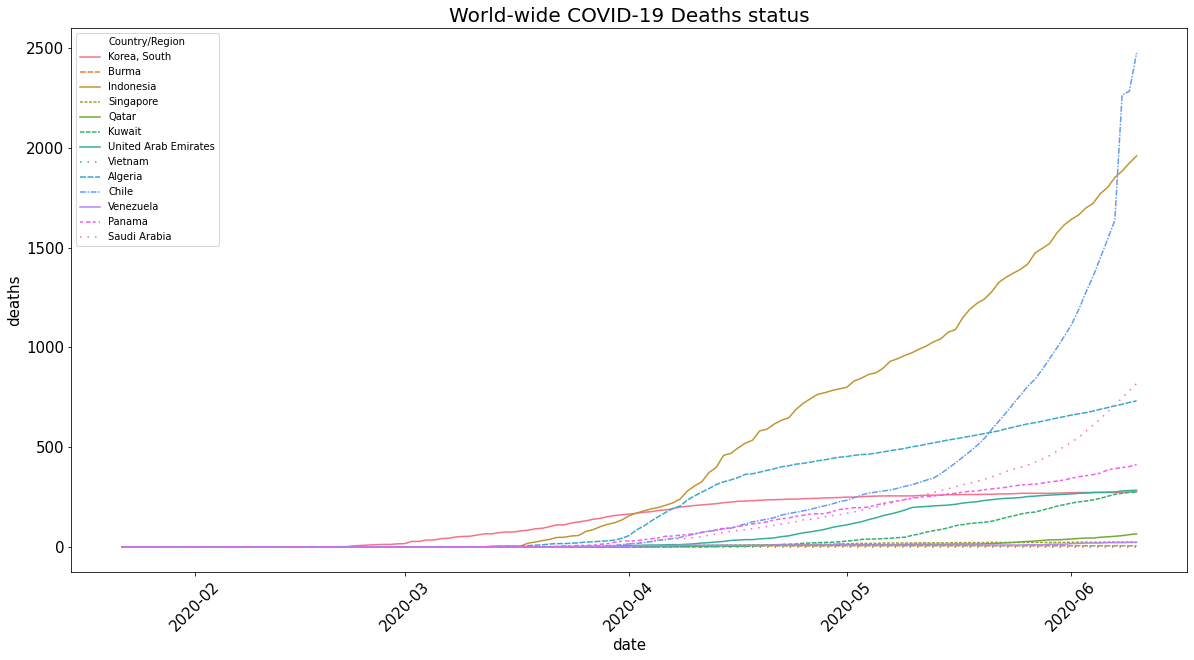

In [ ]:
#@title
#진출국 사망자Time Series data visualization

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Deaths status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')

dash_styles = ["",(4, 1),"",(2, 1),"",(3, 1),
               "",(1, 4, 1, 4),(4,1),(4, 1, 1, 1),"",(2, 2, 3, 1.5),(1,4)]
              
ax=sns.lineplot(x='date',y='deaths',hue='Country/Region', style='Country/Region',dashes=dash_styles, data=ttl_df)

plt.show()

## 진출국 완치자 동향
- 칠레, 사우디, 카타르, 싱가포르, UAE, 쿠웨이트 순으로 완치자 증가

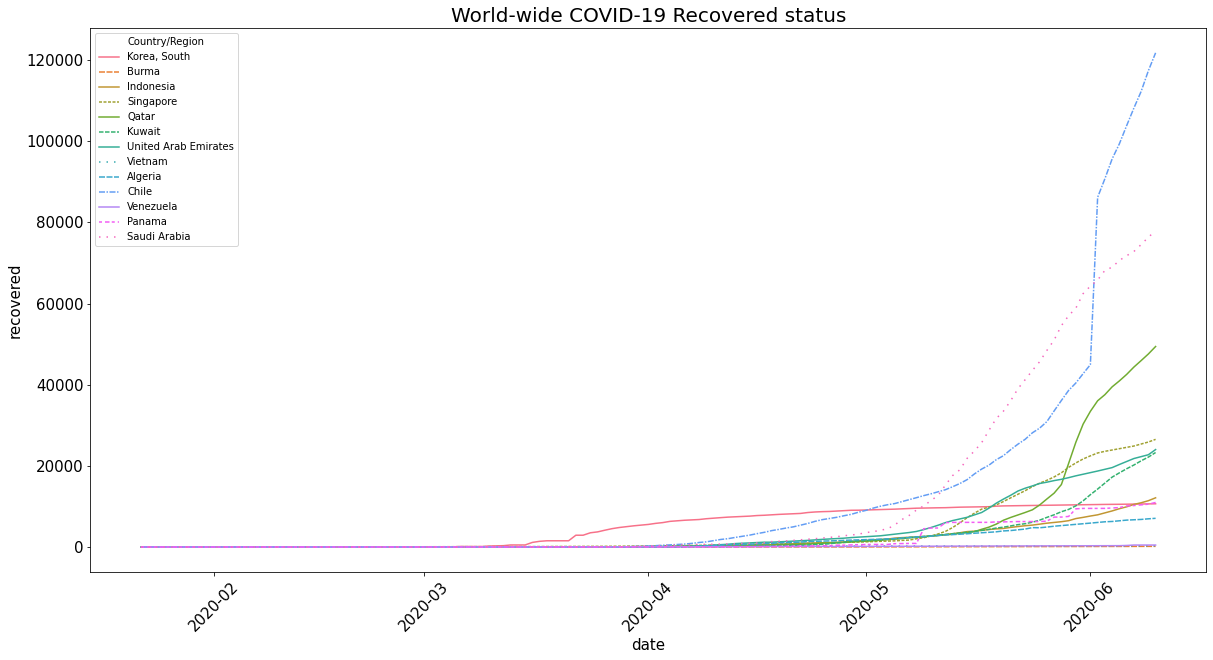

In [ ]:
#@title
#진출국 완치자Time Series data visualization
 
plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Recovered status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')
 
dash_styles = ["",(4, 1),"",(2, 1),"",(3, 1),
               "",(1, 4, 1, 4),(4,1),(4, 1, 1, 1),"",(2, 2, 3, 1.5),(1,4)]
              
ax=sns.lineplot(x='date',y='recovered',hue='Country/Region', style='Country/Region',dashes=dash_styles, data=ttl_df)
 
plt.show()

##진출국 완치율 동향
- 베트남, 대한민국, 칠레가 80% 이상 완치율을 기록
- 인도네시아, 베네수엘라를 제외한 기타 국가는 60%이상의 완치율을 보임 

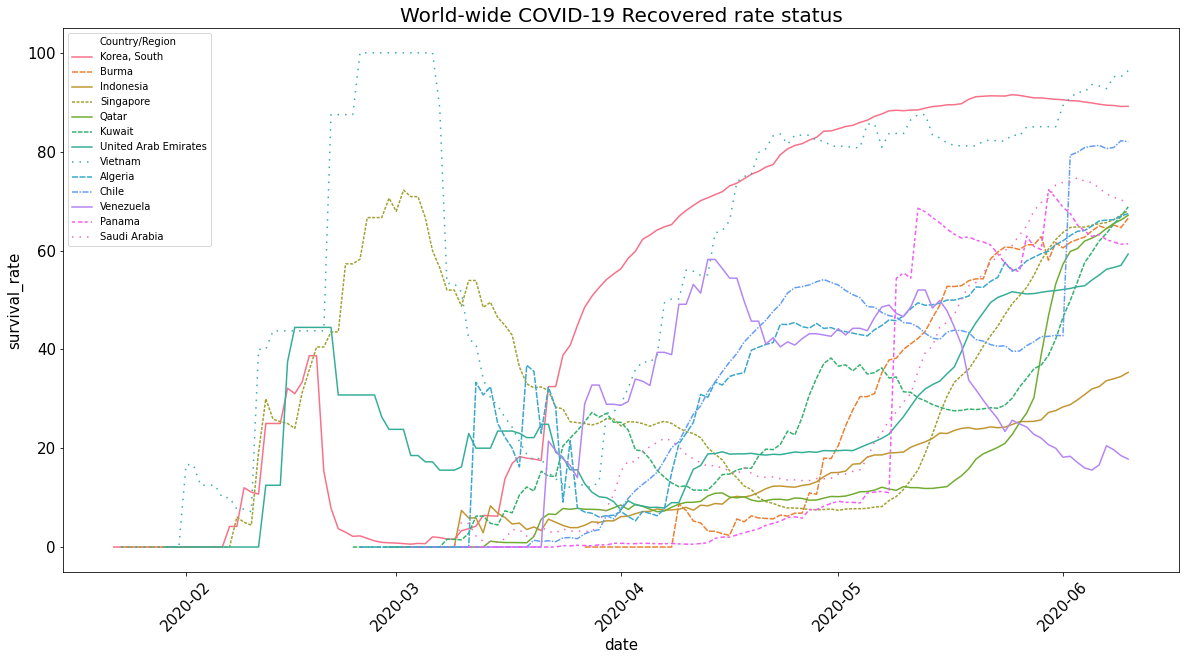

In [ ]:
#@title
#진출국 완치율Time Series data visualization

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Recovered rate status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')

dash_styles = ["",(4, 1),"",(2, 1),"",(3, 1),
               "",(1, 4, 1, 4),(4,1),(4, 1, 1, 1),"",(2, 2, 3, 1.5),(1,4)]
              
ax=sns.lineplot(x='date',y='survival_rate',hue='Country/Region', style='Country/Region',dashes=dash_styles, data=ttl_df)

plt.show()

##진출국 사망율 동향
- 칠레, 인도네시아를 제외하고 대부분의 국가가 3% 아래의 사망율을 기록


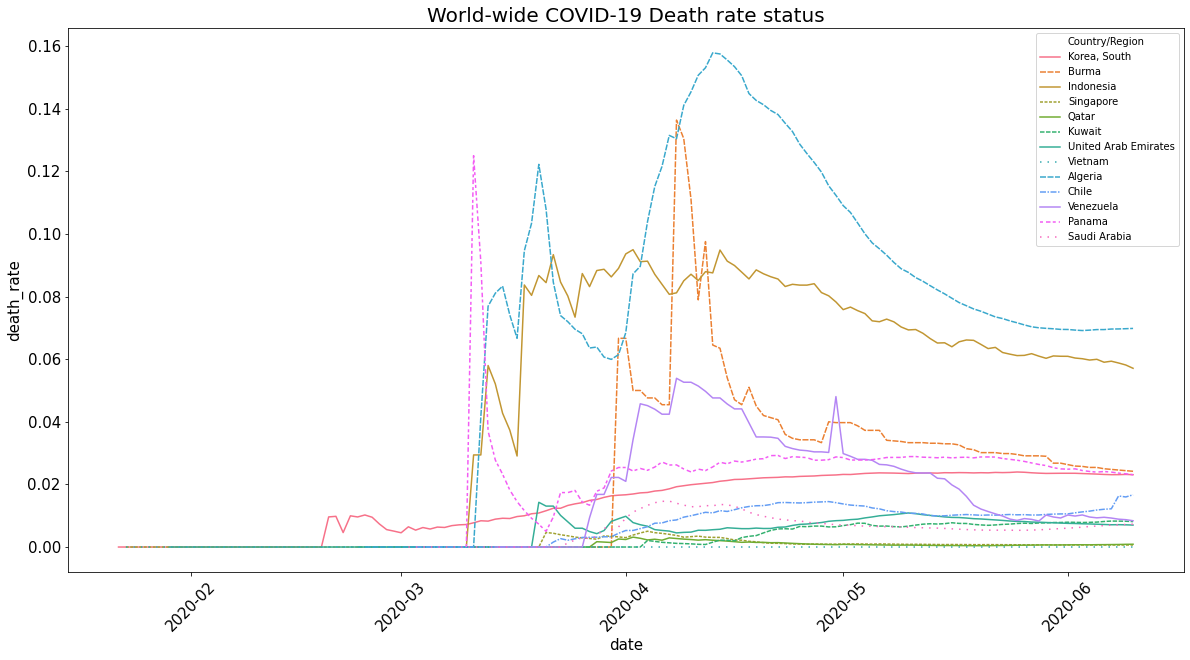

In [ ]:
#@title
#진출국 사망율Time Series data visualization

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Death rate status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')

dash_styles = ["",(4, 1),"",(2, 1),"",(3, 1),
               "",(1, 4, 1, 4),(4,1),(4, 1, 1, 1),"",(2, 2, 3, 1.5),(1,4)]
              
ax=sns.lineplot(x='date',y='death_rate',hue='Country/Region', style='Country/Region',dashes=dash_styles, data=ttl_df)

plt.show()

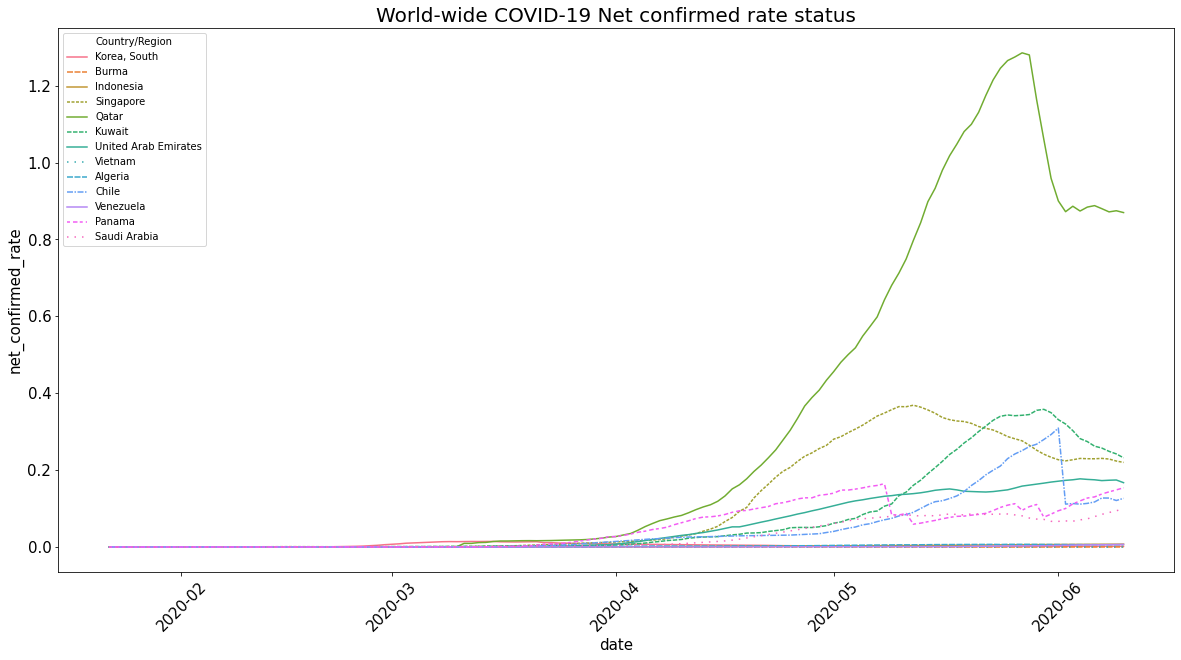

In [ ]:
#진출국 순확진율 그래프

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Net confirmed rate status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')

dash_styles = ["",(4, 1),"",(2, 1),"",(3, 1),
               "",(1, 4, 1, 4),(4,1),(4, 1, 1, 1),"",(2, 2, 3, 1.5),(1,4)]
              
ax=sns.lineplot(x='date',y='net_confirmed_rate',hue='Country/Region', style='Country/Region',dashes=dash_styles, data=ttl_df)

plt.show()

In [ ]:
#국가별 머신러닝 전용 데이터프레임 생성
def fb_predit(country):
  df=pd.DataFrame(columns=['ds','y'])
  df['ds']=ttl_df[ttl_df['Country/Region']==country]['date']
  df['y']=ttl_df[ttl_df['Country/Region']==country]['net_confirmed']
  m=Prophet() #growth='logistic')  #캡을 씌울때만...
  m.fit(df)

  future=m.make_future_dataframe(periods=365)

  forecast=m.predict(future)
  fig1=m.plot(forecast)
  fig1=m.plot_components(forecast)

In [ ]:
df_late=ttl_df[ttl_df['date']=='2020-06-10']

## 인구 대비 확진율 동향


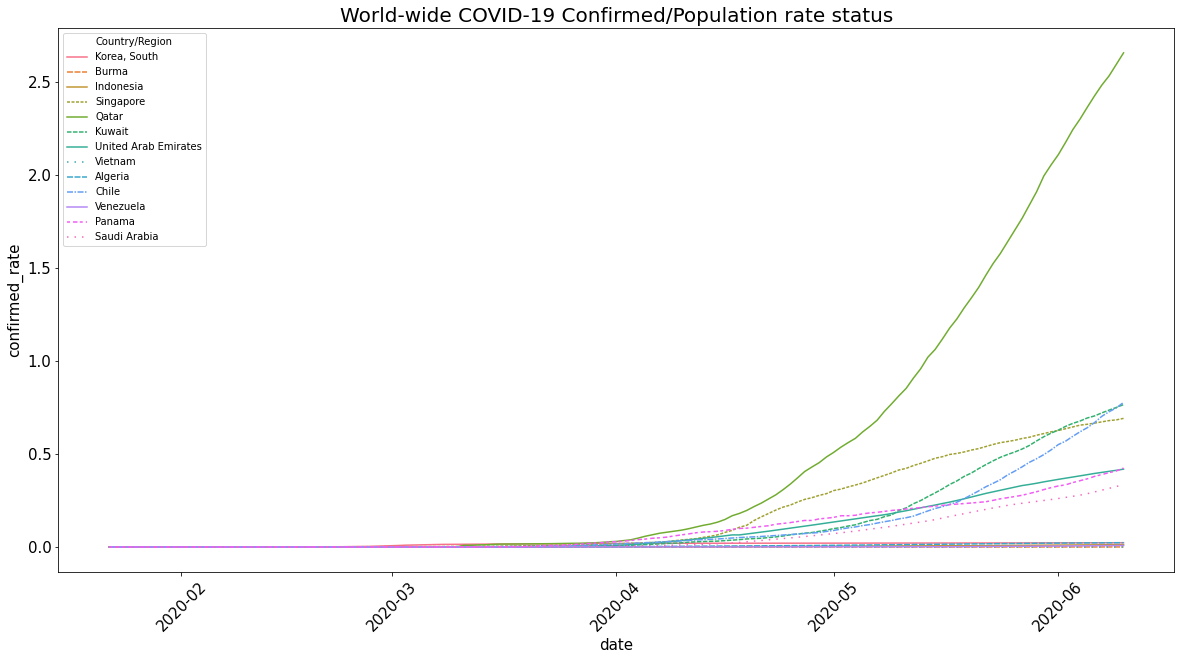

In [ ]:
#진출국 확진율 그래프

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Confirmed/Population rate status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')

dash_styles = ["",(4, 1),"",(2, 1),"",(3, 1),
               "",(1, 4, 1, 4),(4,1),(4, 1, 1, 1),"",(2, 2, 3, 1.5),(1,4)]
              
ax=sns.lineplot(x='date',y='confirmed_rate',hue='Country/Region', style='Country/Region',dashes=dash_styles, data=ttl_df)

plt.show()

## 진출국 사망율/확진율 분포도
- 카타르(2.7%) 제외 인구 대비 1% 내의 확진자 발생
- 알제리(7%), 인도네시아(5.8%)는 확진자 사망률이 기타국가 대비 높아 확진자 관리 필요

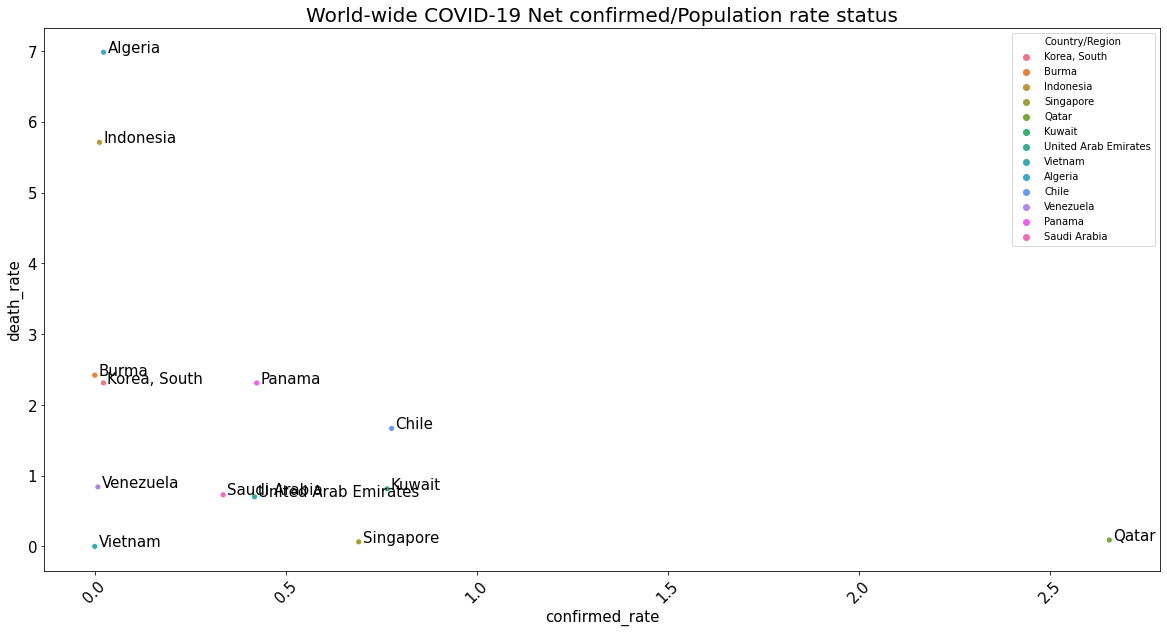

In [ ]:
#진출국 사망율/확진율 분포도 

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Net confirmed/Population rate status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')

sns.scatterplot(x='confirmed_rate',y='death_rate',hue='Country/Region',sizes=500,data=ttl_df[ttl_df['date']=='2020-06-10'])
for c in df_late['Country/Region'].tolist():
  plt.text(df_late[df_late['Country/Region']==c]['confirmed_rate']+0.01, df_late[df_late['Country/Region']==c]['death_rate'], c, fontsize=15)      
      

## 대한민국 코로나 동향 예측
- 검은점이 실제 발생숫자이고 파란선이 예측치이고 하늘색은 예측치의 상하한임
- 시계열데이터 예측 라이브러리를 통한 향후 1년간 동향 예측 결과, 안정적 감소세 예상

In [ ]:
#@title
 
from fbprophet import Prophet

In [ ]:
#@title
#국가별 머신러닝 전용 데이터프레임 생성
df=pd.DataFrame(columns=['ds','y'])

df['ds']=ttl_df[ttl_df['Country/Region']=='Korea, South']['date']
df['y']=ttl_df[ttl_df['Country/Region']=='Korea, South']['net_confirmed']
df.tail()

,ds,y
136,2020-06-06,951.0
137,2020-06-07,978.0
138,2020-06-08,989.0
139,2020-06-09,1015.0
140,2020-06-10,1017.0


In [ ]:
#@title
#df['cap']=1000000000
#df['floor']=0  #예측치의 하한값 '0' 설정

m=Prophet() #growth='logistic')  #캡을 씌울때만...
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#@title
future=m.make_future_dataframe(periods=365)
future.tail()

,ds
501,2021-06-06
502,2021-06-07
503,2021-06-08
504,2021-06-09
505,2021-06-10


In [ ]:
#@title
#future['cap']=1000000000
#future['floor']=0

forecast=m.predict(future)

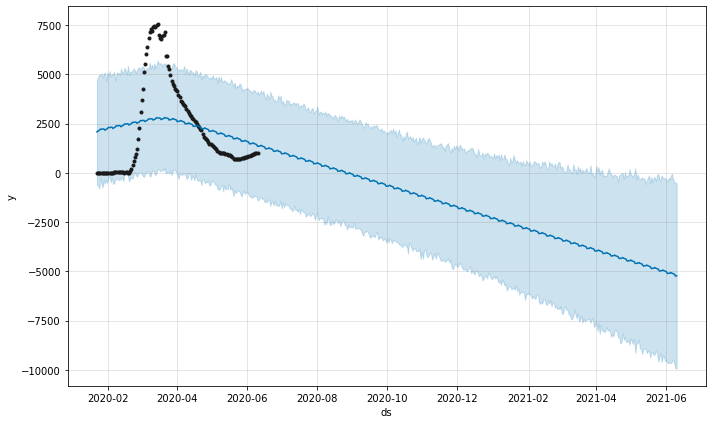

In [ ]:
#@title
fig1=m.plot(forecast)

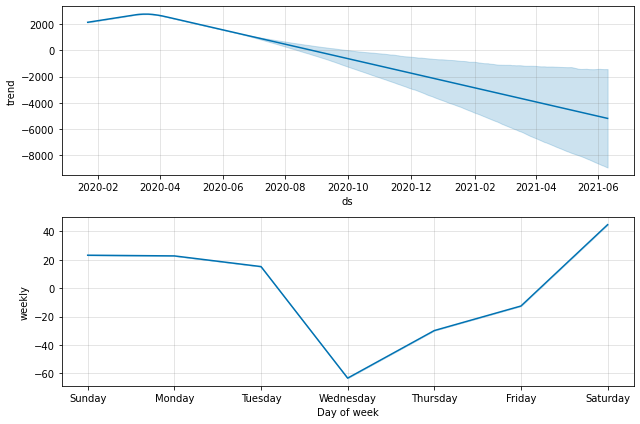

In [ ]:
#@title
fig1=m.plot_components(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


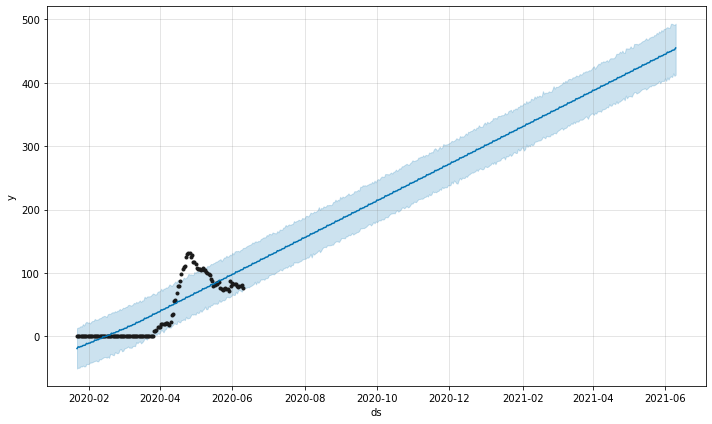

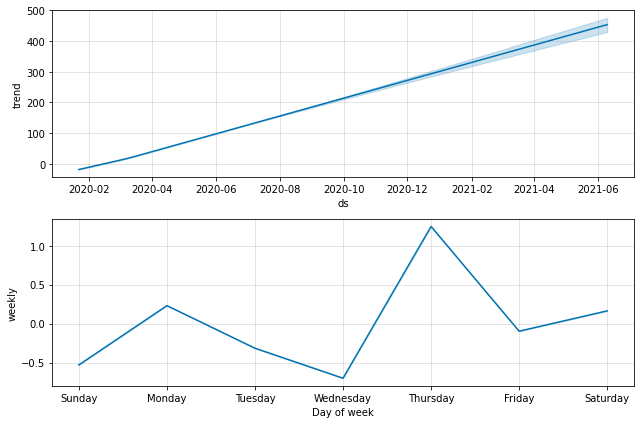

In [ ]:
fb_predit('Burma')